<a href="https://colab.research.google.com/github/davidlin2k/JSC270_A4/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [441]:
import pandas as pd
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

train_url = 'https://github.com/davidlin2k/JSC270_A4/raw/main/Corona_NLP_train.csv'
df_train = pd.read_csv(train_url, encoding='latin1')

test_url = 'https://github.com/davidlin2k/JSC270_A4/raw/main/Corona_NLP_test.csv'
df_test = pd.read_csv(test_url, encoding='latin1')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Part I: Sentiment Analysis with a Twitter Dataset 

### A) Consider the training data. What is the balance between the three classes? In other words, what proportion of the observations (in the training set) belong to each class?

In [442]:
def map_sentiment(df):
  map = {"Extremely Negative": 0, "Negative": 0, "Neutral": 1, "Positive": 2, "Extremely Positive": 2}
  df['Sentiment'].replace(map, inplace=True)

map_sentiment(df_train)

# Proportion of the observations in each class
df_train.groupby('Sentiment').size() / df_train.shape[0]

Sentiment
0    0.374128
1    0.187404
2    0.438467
dtype: float64

### B) Tokenize the tweets. In other words, for each observation, convert the tweet from a single string of running text into a list of individual tokens (possibly with punctuation), splitting on whitespace. The result should be that each observation (tweet) is a list of individual tokens.


In [443]:
df_train['OriginalTweetTokenized'] = df_train.apply(lambda row: nltk.word_tokenize(row['OriginalTweet']), axis=1)

df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during..."


### C) Using a regular expression, remove any URL tokens from each of the observations. 
Hint: In this dataset, all such tokens begin with “http”.

In [444]:
url_pattern = r'http\S+'

df_train['OriginalTweetTokenizedCleaned'] = df_train['OriginalTweetTokenized'].apply(lambda x: [token for token in x if not re.match(url_pattern, token)])

df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized,OriginalTweetTokenizedCleaned
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, :, /..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, to, your, neighbours, family, t..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, to, gi..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, is, not, the, only, one, whi..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, to, go, at, supermarket, during..."


### D) Remove all punctuation (,.?!;:’") and special characters(@, #, +, &, =, $, etc). Also, convert all tokens to lowercase only. Can you think of a scenario when you might want to keep some forms of punctuation?

In [445]:
import string

punct_pattern = r'[{}]'.format(string.punctuation + '’”“”')

df_train['OriginalTweetTokenizedCleaned'] = df_train['OriginalTweetTokenizedCleaned'].apply(lambda x: [re.sub(punct_pattern, '', token).lower() for token in x])

df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized,OriginalTweetTokenizedCleaned
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...","[, menyrbie, , philgahan, , chrisitv, , tcoifz..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advice, talk, to, your, neighbours, family, t..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi...","[coronavirus, australia, , woolworths, to, giv..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, only, one, whi..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during...","[me, , ready, to, go, at, supermarket, during,..."


### E) Now stem your tokens. This will have the effect of converting similar word forms into identical tokens (e.g. run, runs, running → run). Please specify which stemmer you use. 

In [446]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

df_train['OriginalTweetTokenizedCleaned'] = df_train['OriginalTweetTokenizedCleaned'].apply(stem_tokens)

df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized,OriginalTweetTokenizedCleaned
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...","[, menyrbi, , philgahan, , chrisitv, , tcoifz9..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advic, talk, to, your, neighbour, famili, to,..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi...","[coronaviru, australia, , woolworth, to, give,..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, onli, one, whi..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during...","[me, , readi, to, go, at, supermarket, dure, t..."


### F) Lastly, remove stopwords. Using the english stopwords list from nltk, remove these common words from your observations. This list is very long (I think almost 200 words), so remove only the first 100 stopwords in the list.

In [447]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')[:100])
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words and token != '']

df_train['OriginalTweetTokenizedCleaned'] = df_train['OriginalTweetTokenizedCleaned'].apply(remove_stopwords)

df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized,OriginalTweetTokenizedCleaned
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...","[menyrbi, philgahan, chrisitv, tcoifz9fan2pa, ..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi...","[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[food, stock, not, onli, one, empti, pleas, nt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during...","[readi, go, supermarket, dure, covid19, outbre..."


### G) Now convert your lists of words into vectors of word counts. You may find Scikit-learn’s CountVectorizer useful here. What is the length of your vocabulary? 

In [448]:
from sklearn.feature_extraction.text import CountVectorizer

X, y = df_train['OriginalTweetTokenizedCleaned'], df_train['Sentiment']

def override_fcn(doc):
  return doc

count_vec = CountVectorizer()

X_train = count_vec.fit_transform(X.apply(" ".join))
print(len(count_vec.vocabulary_))

73343


### H) Recall the definition of the Naive Bayes model. If each document (tweet) is a collection of words (w1, · · · , wN ) belonging to class Ck (k = 0, 1, 2), then the Naive Bayes approach models the probability of each tweet belonging to class k:

The last equality follows from our “naive” assumption that words are conditionally independent given class. The probabilities are estimated using the frequencies of words within each class (bag of words), and we assign the class label according to which of the 3 posterior class probabilities (P(Ck|w1,··· ,wN)) is the highest.

Fit a Naive Bayes model to your data. Report the training and test error of the model. Use accuracy as the error metric. Also, report the 5 most probable words in each class, along with their counts. You might find Scikit-learn’s MultinomialNB() transformer useful. Use Laplace smoothing to prevent probabilities of zero.


In [449]:
def clean_df(df, col, new_col):
  # B)
  df['OriginalTweetTokenized'] = df.apply(lambda row: nltk.word_tokenize(row[col]), axis=1)
  
  # C)
  url_pattern = r'http\S+'
  df[new_col] = df['OriginalTweetTokenized'].apply(lambda x: [token for token in x if not re.match(url_pattern, token)])

  # D)
  punct_pattern = r'[{}]'.format(string.punctuation + '’”“”' + string.digits)
  df[new_col] = df[new_col].apply(lambda x: [re.sub(punct_pattern, '', token).lower() for token in x])

  # E)
  stemmer = PorterStemmer()
  df[new_col] = df[new_col].apply(stem_tokens)

  # F)
  stop_words = set(stopwords.words('english')[:100])
  df[new_col] = df[new_col].apply(remove_stopwords)

map_sentiment(df_test)
clean_df(df_test, 'OriginalTweet', 'OriginalTweetTokenizedCleaned')
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweetTokenized,OriginalTweetTokenizedCleaned
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0,"[TRENDING, :, New, Yorkers, encounter, empty, ...","[trend, new, yorker, encount, empti, supermark..."
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,2,"[When, I, could, n't, find, hand, sanitizer, a...","[when, could, nt, find, hand, sanit, fred, mey..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,2,"[Find, out, how, you, can, protect, yourself, ...","[find, how, can, protect, love, one, coronaviru]"
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,"[#, Panic, buying, hits, #, NewYork, City, as,...","[panic, buy, hit, newyork, citi, anxiou, shopp..."
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,1,"[#, toiletpaper, #, dunnypaper, #, coronavirus...","[toiletpap, dunnypap, coronaviru, coronavirusa..."


In [450]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_train = df_train['Sentiment']
X_test, y_test = df_test['OriginalTweetTokenizedCleaned'], df_test['Sentiment']

X_test = count_vec.transform(X_test.apply(" ".join))

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)

# Predict on test data
y_preds = nb.predict(X_train)
print('Test accuracy with simple Naive Bayes on training data:', accuracy_score(y_train, y_preds))

y_preds = nb.predict(X_test)
print('Test accuracy with simple Naive Bayes on test data:', accuracy_score(y_test, y_preds))


Test accuracy with simple Naive Bayes on training data: 0.8179896493913551
Test accuracy with simple Naive Bayes on test data: 0.6700895208004213


In [451]:
feature_names = count_vec.get_feature_names_out()
class_labels = nb.classes_

label_to_category = ["Negative", "Neutral", "Positive"]

for label in class_labels:
    i = class_labels.tolist().index(label)

    indices = nb.feature_log_prob_[i].argsort()[-5:][::-1]
    words = [feature_names[index] for index in indices]
    counts = [nb.feature_count_[i][index] for index in indices]
    print(label_to_category[i], list(zip(words, counts)))

Negative [('coronaviru', 6737.0), ('covid19', 5816.0), ('price', 4349.0), ('food', 3641.0), ('thi', 3229.0)]
Neutral [('coronaviru', 3812.0), ('covid19', 3220.0), ('store', 1589.0), ('supermarket', 1444.0), ('price', 1365.0)]
Positive [('coronaviru', 7513.0), ('covid19', 7066.0), ('store', 3918.0), ('thi', 3798.0), ('price', 3342.0)]


### I) Would it be appropriate to fit an ROC curve in this scenario? If yes, explain why. If no, explain why not.


No, it would not be appropriate to fit an ROC curve in this scenario.

An ROC curve is a graphical representation of the performance of a binary classifier system as the discrimination threshold is varied. In other words, it is a tool for evaluating the performance of a model that predicts a binary outcome based on a continuous score. However, in this scenario, the model predicts the probability of each tweet belonging to one of three classes based on the frequencies of words within each class.

Therefore, fitting an ROC curve is not appropriate in this scenario because it is not a binary classification problem and the model does not predict a continuous score. Instead, we can use evaluation metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the Naive Bayes model.

### J) Redo parts G-H using TF-IDF vectors instead of count vectors. You might find Scikitlearn’s TfidfVectorizer() transformer useful. Report the training and test accuracy. How does this compare to the accuracy using count vectors?  


In [452]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, y_train = df_train['OriginalTweetTokenizedCleaned'], df_train['Sentiment']
X_test, y_test = df_test['OriginalTweetTokenizedCleaned'], df_test['Sentiment']

tfidf_vec = TfidfVectorizer()

X_train = tfidf_vec.fit_transform(X_train.apply(" ".join))
X_test = tfidf_vec.transform(X_test.apply(" ".join))

nb.fit(X_train, y_train)

y_preds = nb.predict(X_train)
print('Test accuracy with simple Naive Bayes on training data:', accuracy_score(y_train, y_preds))

y_preds = nb.predict(X_test)
print('Test accuracy with simple Naive Bayes on test data:', accuracy_score(y_test, y_preds))

Test accuracy with simple Naive Bayes on training data: 0.7256359792987828
Test accuracy with simple Naive Bayes on test data: 0.6237493417588205


In [453]:
feature_names = tfidf_vec.get_feature_names_out()
class_labels = nb.classes_

label_to_category = ["Negative", "Neutral", "Positive"]

for label in class_labels:
    i = class_labels.tolist().index(label)

    indices = nb.feature_log_prob_[i].argsort()[-5:][::-1]
    words = [feature_names[index] for index in indices]
    counts = [nb.feature_count_[i][index] for index in indices]
    print(label_to_category[i], list(zip(words, counts)))

Negative [('coronaviru', 446.1102607737225), ('covid19', 401.8190307962107), ('price', 390.11029529303096), ('food', 369.9140312787462), ('thi', 302.4997366031556)]
Neutral [('coronaviru', 284.8050794748103), ('covid19', 253.53289190750993), ('store', 184.43590109005157), ('supermarket', 166.6960173162174), ('groceri', 159.36920313190842)]
Positive [('coronaviru', 490.5219327784592), ('covid19', 479.5335481558695), ('store', 383.6869648967932), ('thi', 357.30512159482663), ('groceri', 344.07817958665845)]


From the accuracy reported with simple Naive Bayes, we can see that with Tfidf Vectorizer, the accuracy has slightly when comparing to both the training data and the testing data.

### K) Recall lemmatization converts each word to its base form, which is a bit stronger than simply taking the stem. Redo parts E-H using TF-IDF vectors instead of count vectors. This time use lemmatization instead of stemming. Report train and test accuracy. How does the accuracy with lemmatization compare to the accuracy with stemming? 

In [454]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

def lemmatize_df(df):
  df['OriginalTweetTokenizedCleaned'] = df['OriginalTweetTokenized'].apply(lambda x: [token for token in x if not re.match(url_pattern, token)])
  df['OriginalTweetTokenizedCleaned'] = df['OriginalTweetTokenizedCleaned'].apply(lemmatize_tokens)
  df['OriginalTweetTokenizedCleaned'] = df['OriginalTweetTokenizedCleaned'].apply(remove_stopwords)

lemmatize_df(df_train)
lemmatize_df(df_test)

In [455]:
X_train = df_train['OriginalTweetTokenizedCleaned']
X_test = df_test['OriginalTweetTokenizedCleaned']

tfidf_vec = TfidfVectorizer()

X_train = tfidf_vec.fit_transform(X_train.apply(" ".join))
X_test = tfidf_vec.transform(X_test.apply(" ".join))

nb.fit(X_train, y_train)

y_preds = nb.predict(X_train)
print('Test accuracy with simple Naive Bayes on training data:', accuracy_score(y_train, y_preds))

y_preds = nb.predict(X_test)
print('Test accuracy with simple Naive Bayes on test data:', accuracy_score(y_test, y_preds))

Test accuracy with simple Naive Bayes on training data: 0.7329737347231333
Test accuracy with simple Naive Bayes on test data: 0.6182201158504476


In [456]:
feature_names = tfidf_vec.get_feature_names_out()
class_labels = nb.classes_

label_to_category = ["Negative", "Neutral", "Positive"]

for label in class_labels:
    i = class_labels.tolist().index(label)

    indices = nb.feature_log_prob_[i].argsort()[-5:][::-1]
    words = [feature_names[index] for index in indices]
    counts = [nb.feature_count_[i][index] for index in indices]
    print(label_to_category[i], list(zip(words, counts)))

Negative [('co', 453.96663660547733), ('coronavirus', 428.47109342382623), ('19', 363.16706855905556), ('price', 357.6478954549523), ('food', 356.2430111110362)]
Neutral [('co', 360.9533163580895), ('coronavirus', 273.7238338258587), ('19', 192.24152404344423), ('covid', 189.0139259698027), ('store', 174.1831420076595)]
Positive [('co', 580.0481703638764), ('coronavirus', 471.38951797648997), ('19', 402.50290587739954), ('covid', 389.65844824333794), ('store', 366.130771261546)]


From the accuracy reported, it seems that the accuracy is very similar to when we lemmatize the tokens instead of stemming them.

## Part II: Having fun with NLP using the Twitter API

In [457]:
url = 'https://raw.githubusercontent.com/davidlin2k/JSC270_A4/main/tweets.csv'
df = pd.read_csv(url)

### (I) Problem description and motivation

In [458]:
%pip install datasets
from datasets import load_dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [459]:
dataset = load_dataset("nomic-ai/gpt4all_prompt_generations")

  0%|          | 0/1 [00:00<?, ?it/s]

In [460]:
df1 = pd.DataFrame({'text': dataset['train']['response'][:10000], 'generated': 1})
df2 = pd.DataFrame({'text': df['tweet_text'], 'generated': 0})

new_df = pd.concat([df1, df2])

clean_df(new_df, 'text', 'clean_text')

### (II) Describe the data

In [461]:
new_df.groupby('generated').size() / new_df.shape[0]

generated
0    0.5
1    0.5
dtype: float64

### (III) Exploratory data analysis

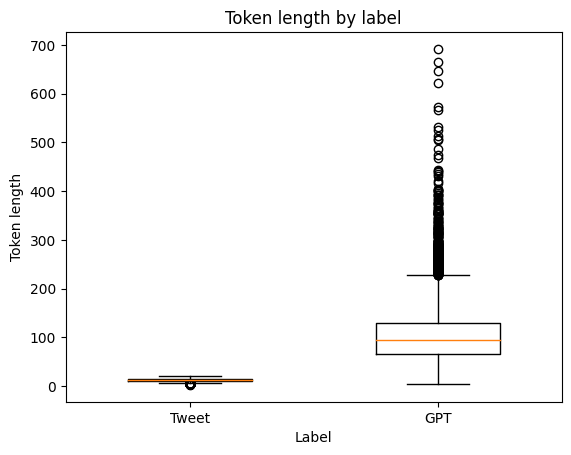

In [462]:
from sklearn.model_selection import train_test_split
from collections import Counter

X, y = new_df['clean_text'], new_df['generated']

# Calculate the length of each string in the 'text' column
tweet_lengths = new_df[new_df.generated == 0]['clean_text'].apply(len)
gpt_lengths = new_df[new_df.generated == 1]['clean_text'].apply(len)

fig, ax = plt.subplots()
ax.boxplot(tweet_lengths, positions=[0], widths=0.5)
ax.boxplot(gpt_lengths, positions=[1], widths=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Tweet', 'GPT'])
ax.set_xlabel("Label")
ax.set_ylabel("Token length")
ax.set_title("Token length by label")
plt.show()

### (IV) Describe your machine learning model

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = count_vec.fit_transform(X_train.apply(" ".join))
X_test = count_vec.transform(X_test.apply(" ".join))

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)

y_preds = nb.predict(X_test)
print('Test accuracy with simple Naive Bayes on test data:', accuracy_score(y_test, y_preds))

Test accuracy with simple Naive Bayes on test data: 0.99725


In [476]:
def predict(word):
  y_preds = nb.predict(count_vec.transform([word]))
  if y_preds[0] == 0:
    print("Likely Human Written")
  else:
    print("Likely AI Generated")

In [465]:
nb.score(X_test, y_test)

0.99725

Supervised Learning - Classificaiton

Fit the Model

Make Predictions

Calculate Accuracy

### (V) Results and Conclusions

Interactive Player

In [486]:
def process_text(text):
  text = re.sub(punct_pattern, '', text).lower()
  text = stem_tokens(text.split())
  text = remove_stopwords(text)

  return " ".join(text)

# Non-Dataset Test

# Tweet
word = "Today, Prime Minister Justin Trudeau was at @HondaCanada’s manufacturing plant in Alliston, Ontario. He met with auto workers to discuss Budget2023 measures that will continue to support workers across the country and build a clean economy. More details: http://ow.ly/ewW250NBEq7"
predict(process_text(word))

# Tweet
word = "Choose your weapon. See #JohnWick4 in theaters now."
predict(process_text(word))

# Shakesphere
word = "If music be the food of love, play on; Give me excess of it, that, surfeiting, The appetite may sicken, and so die. That strain again! it had a dying fall: O, it came o'er my ear like the sweet sound, That breathes upon a bank of violets, Stealing and giving odour! Enough; no more: 'Tis not so sweet now as it was before. O spirit of love! how quick and fresh art thou, That, notwithstanding thy capacity Receiveth as the sea, nought enters there, Of what validity and pitch soe'er, But falls into abatement and low price, Even in a minute: so full of shapes is fancy That it alone is high fantastical."
predict(process_text(word))

# Obama
word = "Don't let anyone tell you what you can't do. Follow your dreams and persist."
predict(process_text(word))

# AI
word = "Yes, you can use Sonar to display the results of the output produced by FxCop. Sonar has a plugin called 'SonarQube Scanner for MSBuild' which can read in the XML file generated by FxCop and display the results."
predict(process_text(word))

# AI
word = "To monitor both standard input (stdin) and the socket without blocking, the select() system call can be used. Here is an example implementation:"
predict(process_text(word))

Likely Human Written
Likely Human Written
Likely Human Written
Likely Human Written
Likely AI Generated
Likely AI Generated


In [487]:
# Powerpoint Intro (GPT4)
word = "In today's digital age, the rapid advancements in artificial intelligence \
have led to the development of increasingly sophisticated language models, such as \
GPT-4, capable of generating contextually coherent and grammatically accurate text.\
 While these AI-generated texts offer numerous benefits, they also pose potential \
 risks, such as the spread of misinformation, deception, and a decline in trust in \
 online information. As a result, it is crucial to develop methods that can accurately\
  distinguish between human-written and AI-generated text."
predict(process_text(word))

Likely AI Generated


<ipython-input-468-11886a83ccd6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45, ha='right')


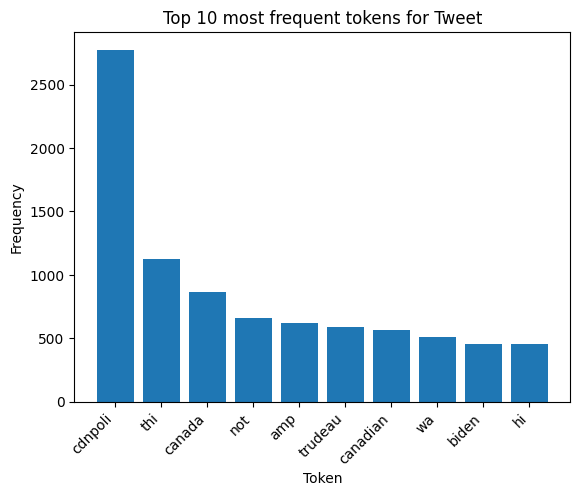

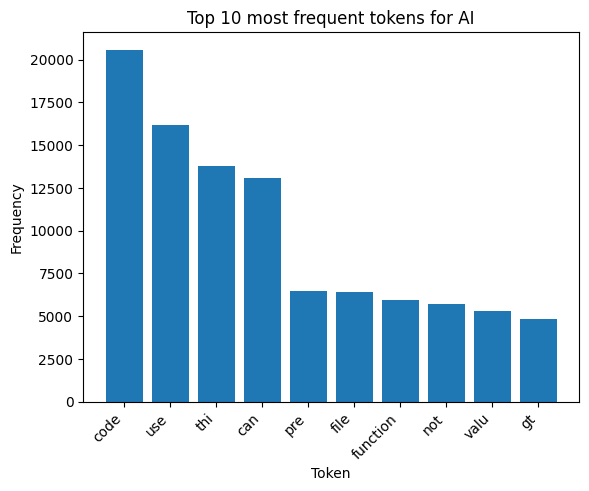

In [468]:
import matplotlib.pyplot as plt

feature_names = count_vec.get_feature_names_out()
class_labels = nb.classes_

label_to_category = ["Tweet", "AI"]

for label in class_labels:
    i = class_labels.tolist().index(label)

    indices = nb.feature_log_prob_[i].argsort()[-10:][::-1]
    words = [feature_names[index] for index in indices]
    counts = [nb.feature_count_[i][index] for index in indices]
    
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.set_xlabel("Token")
    ax.set_ylabel("Frequency")
    ax.set_title("Top 10 most frequent tokens for " + label_to_category[i])
    plt.show()